## student name: fatima Nawab

###(breakout room 2

1.syed basharat ali

2.irtaza akram

3.fatima nawab
)


## Deep Learning — Module Assignment

## Objective
Design, train, and tune a **Multilayer Perceptron (MLP)** to classify points in a **challenging 3-class spiral dataset**.  
You must choose the model architecture and hyperparameters thoughtfully to achieve good performance despite noise and complex decision boundaries.

## Dataset
You will generate the dataset yourself using the following code:

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

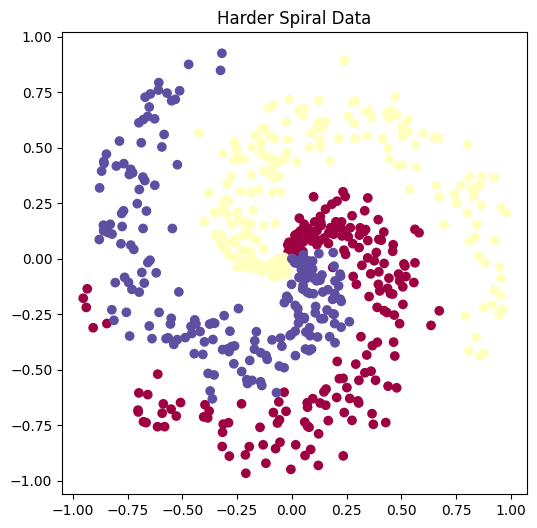

In [3]:
def generate_harder_spiral_data(points_per_class=200, noise=0.4, num_classes=3):
    N = points_per_class  # points per class
    D = 2                 # input dimension
    K = num_classes       # number of classes
    X = np.zeros((N*K, D))
    y = np.zeros(N*K, dtype='uint8')

    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    return X, y

# Generate data
X, y = generate_harder_spiral_data()

# Plot
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")
plt.title('Harder Spiral Data')
plt.show()

---

	•	Points per class: 200
	•	Noise level: 0.4
	•	Classes: 3

## Tasks to Perform

### 1. Data Preparation
	•	Split the dataset into training and testing sets (e.g., 80%-20%).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape[0], X_test.shape[0]

(480, 120)

### 2. Model Building

Build an MLP that classifies the spiral data.

You must decide:

	•	Number of hidden layers
	•	Number of neurons per layer
	•	Activation functions
	•	Optimizer and learning rate
	•	Batch size
	•	Epochs (training for at least 300–500 epochs may be needed)

In [11]:
model = Sequential([
    Input(shape=(2,)),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,819 (42.26 KB)

 Trainable params: 10,819 (42.26 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=400,
    batch_size=32,
    callbacks=[reduce_lr, early_stop],
    verbose=1
)

Epoch 1/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4792 - loss: 0.9806 - val_accuracy: 0.5417 - val_loss: 0.8488 - learning_rate: 0.0100
Epoch 2/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6456 - loss: 0.7413 - val_accuracy: 0.6917 - val_loss: 0.6660 - learning_rate: 0.0100
Epoch 3/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7555 - loss: 0.6033 - val_accuracy: 0.8500 - val_loss: 0.4436 - learning_rate: 0.0100
Epoch 4/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8544 - loss: 0.4139 - val_accuracy: 0.9333 - val_loss: 0.2505 - learning_rate: 0.0100
Epoch 5/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8962 - loss: 0.3042 - val_accuracy: 0.9500 - val_loss: 0.1828 - learning_rate: 0.0100
Epoch 6/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8888 - loss: 0.2889 - val_accuracy: 0.8667 - val_loss: 0.2861 - learning_rate: 0.0100
Epoch 7/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8826 - loss: 0.2888 - val_ac

### 3. Model Evaluation
	•	Plot training and validation loss/accuracy curves.
	•	Plot the decision boundary.

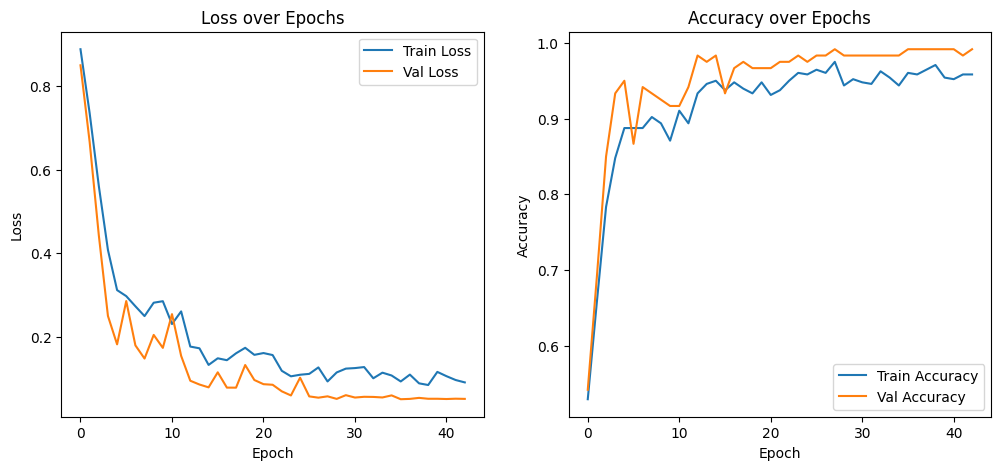

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

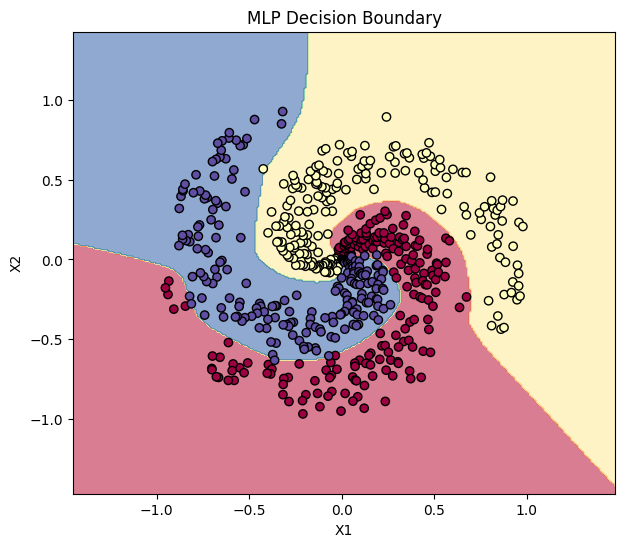

In [8]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid, verbose=0)

    Z = np.argmax(preds, axis=1)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, cmap='Spectral', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', edgecolors='k')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary(model, X, y, "MLP Decision Boundary")

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
test_acc

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9852 - loss: 0.0570 


0.9916666746139526

### 4. Reflection Questions

Answer these inside your notebook:

	1.	How did you decide the number of hidden layers and neurons?

I experimented with different numbers of neurons and hidden layers to find the most effective structure for the spiral classification problem. Initially, smaller models failed to capture the complex spiral patterns, while larger ones started to overfit the data. After several trials and by reviewing TensorFlow examples for reference, I finalized a model with  3 hidden layers (128, 64, 32) to help the model learn complex spiral boundaries.
The ReLU activation lets the network learn non-linear curves.
Dropout prevents overfitting, and the softmax output classifies the three spiral arms.
I used the Adam optimizer with a moderate learning rate (0.01) for faster convergence.

	2.	How did different learning rates affect the results?

I experimented with different learning rates to understand their impact on model performance and convergence. When I used a smaller learning rate of 0.001, the model trained more slowly and achieved a test accuracy of 0.96 with a loss of 0.244. Although the results were stable, the learning process took longer to reach good accuracy.

When I increased the learning rate to 0.01, the model converged faster and achieved a higher test accuracy of 0.98 with a lower loss of 0.05. This learning rate allowed the optimizer to make more effective updates without overshooting the optimal point. Therefore, 0.01 provided the best balance between speed and performance for this dataset.

	3.	Did you encounter overfitting or underfitting? How did you deal with it?

During training, I observed a slight indication of overfitting, where the training accuracy was higher than the validation accuracy after several epochs. This happens when the model starts to memorize training data instead of generalizing patterns.

To address this, I applied several regularization techniques:

Added Dropout layers (rate = 0.2) after dense layers to randomly deactivate neurons during training, forcing the network to learn more robust features.

Used EarlyStopping to stop training automatically when the validation loss stopped improving, preventing unnecessary over-training.

Reduced the learning rate using ReduceLROnPlateau to allow smoother convergence in later epochs.

	4.	If you had more time, how would you further improve the model?

If I had more time, I would focus on further improving the model’s generalization and robustness. Some potential improvements include:

Hyperparameter tuning: Experimenting with different learning rates, batch sizes, and optimizers (e.g., RMSprop, Nadam) to find the most optimal combination.

Model architecture optimization: Testing additional layers or neurons, or using advanced activation functions like LeakyReLU or ELU to enhance non-linear learning.

Regularization techniques: Applying L2 weight regularization or varying the dropout rate to further reduce overfitting.